# Water pump data predictions

## Group:
    
- Isaac Gonzales Vizcarra
- Ibrahim Sobh
- Anthony Siampiringue


## Dataset:
    https://www.kaggle.com/datasets/nphantawee/pump-sensor-data
        
## Description:
- Data driven prediction models of water pump sensor.

## Anomalies:
- Detect atypical peak when compared to surrounding past measurements that are lower. 
- Detect RECOVERING and BROKEN status         

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
import numpy as np 
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KDTree

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sensor.csv", parse_dates=["timestamp"], index_col="timestamp")
data_df = data.copy()
data_df.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:01:00,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2018-04-01 00:02:00,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
2018-04-01 00:03:00,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
2018-04-01 00:04:00,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [ ]:
data_df.drop(columns=['Unnamed: 0'], inplace=True)
data_df.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

## Pump nomalies

In [ ]:
data_df["machine_status"].value_counts()


NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

encod = LabelEncoder()
encod.fit(data_df['machine_status'])

data_df_encod = data_df.copy()
data_df_encod['machine_status'] = encod.transform(data_df_encod['machine_status'])

data_df_encod.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,1
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,1
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,1
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,1


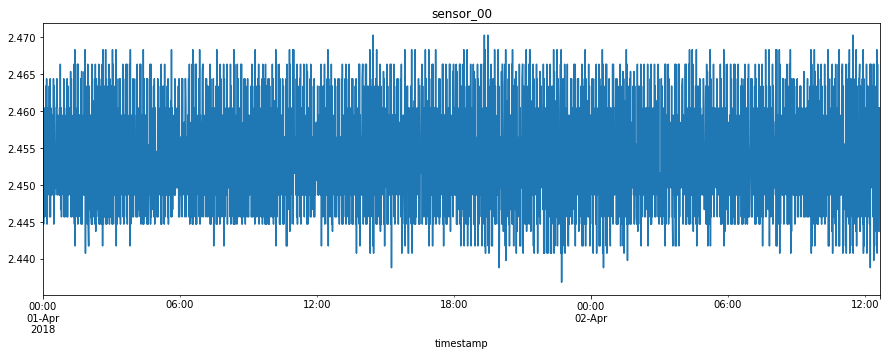

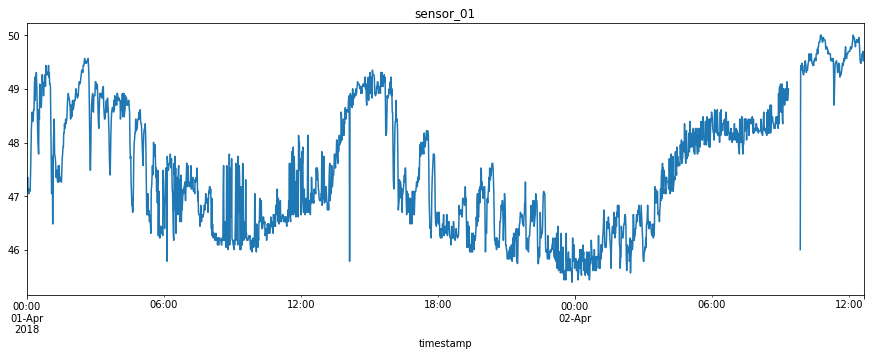

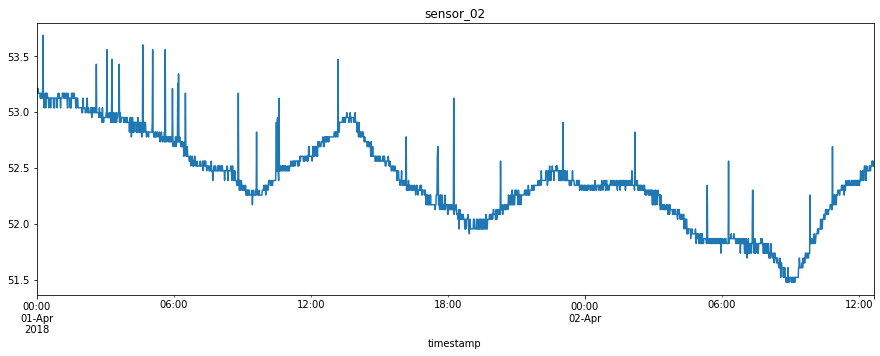

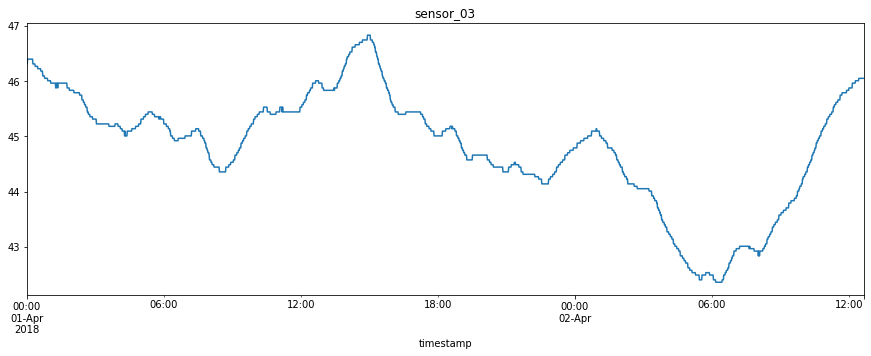

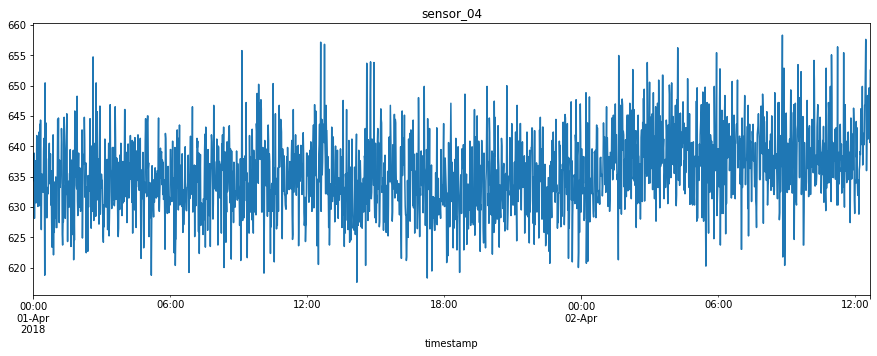

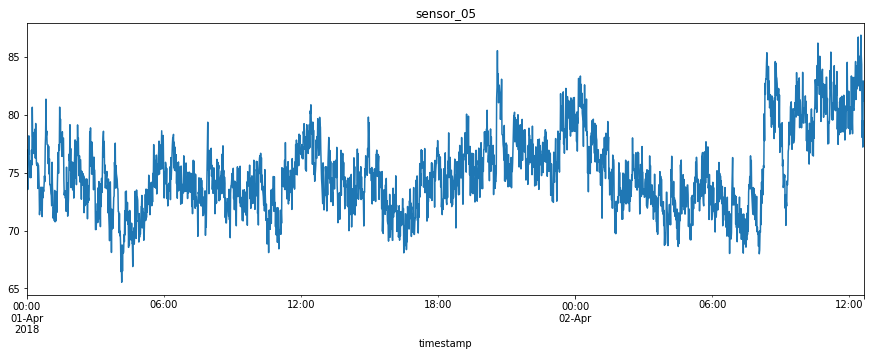

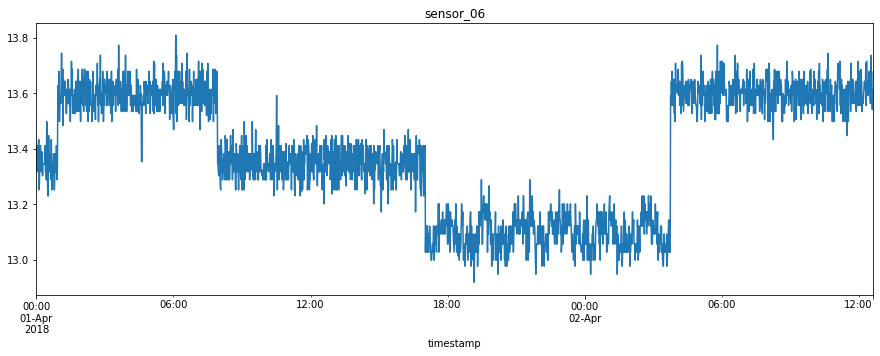

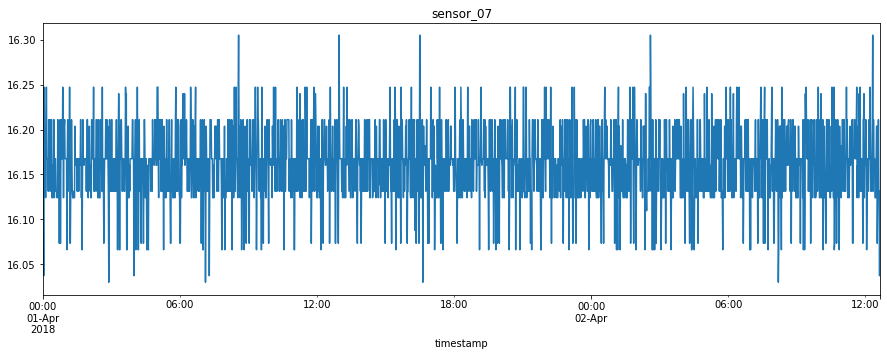

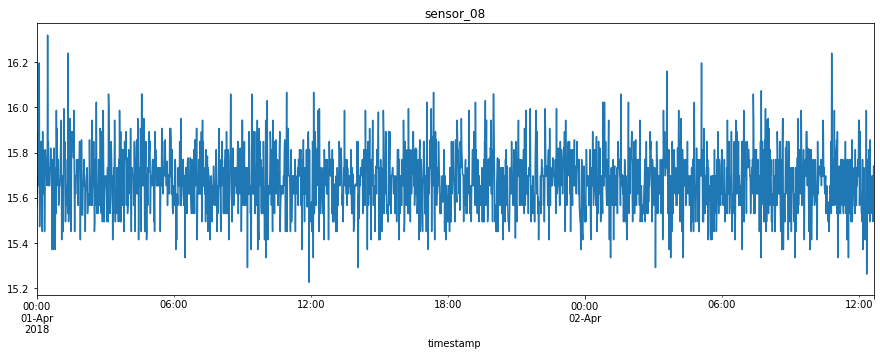

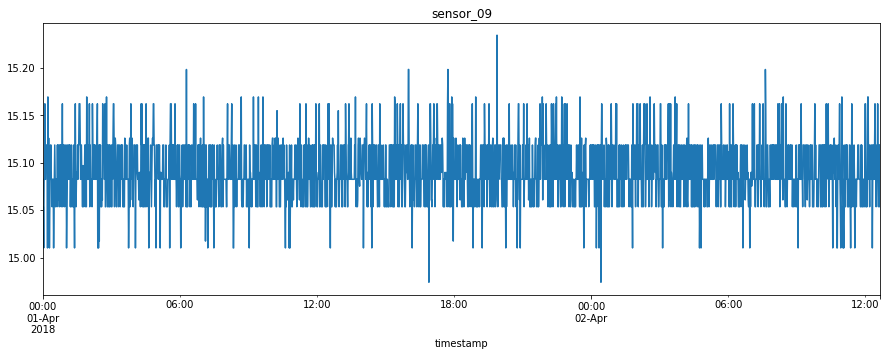

In [ ]:
for data_info in data_df_encod.columns[:10]:
    data_df_encod[data_info][:2200].plot();
    plt.title(data_info)
    plt.show()

# Dataset Analysis

In [ ]:
data_df_encod = data_df_encod.drop(['sensor_15'], axis=1)

In [ ]:
labels=data_df_encod["machine_status"]

In [ ]:
data_df_encod = data_df_encod.bfill()

In [ ]:
def detection_anomalies(data_df_encod, outlier, normal,sensor, Z):
    plt.figure(figsize=(15,4))
    data_sensor = data_df_encod[sensor]
    data_sensor.plot(alpha=0.5)
    
    anomalies_FP = data_sensor[(Z==outlier) & (data_df_encod['machine_status']==1)]
    if anomalies_FP.size:
        anomalies_FP.plot(marker='X', linestyle='none', c="g", alpha=0.7)

    anomalies_TP = data_df_encod[((data_df_encod['machine_status']==2) | (data_df_encod['machine_status']==0)) & (Z==outlier)][sensor]
    if anomalies_TP.size:
        anomalies_TP.plot(marker='x', linestyle='none', c="b", alpha=0.7)
    
    anomalies_FN = data_df_encod[((data_df_encod['machine_status']==2) | (data_df_encod['machine_status']==0)) & (Z==normal)][sensor]
    if anomalies_FN.size:
        anomalies_FN.plot(marker='x', linestyle='none', c="r", alpha=0.7)
        
    anomalies_TN = data_df_encod[(data_df_encod['machine_status']==1) & (Z==normal)][sensor]
    plt.show()
    
    box = plt.boxplot([data_df_encod[(Z==outlier)][sensor], anomalies_TP, anomalies_FP, anomalies_FN, anomalies_TN ], 
                vert=False, patch_artist=True, labels=["Prediction", "TP","FP", "FN", "TN"])
    
    colors = [ "w", "b", "g", "r", "y"]
    for line, color in zip(box['boxes'], colors):
        line.set(facecolor = color )
        
    plt.show()
    
    return  anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN




def results_metrics(data_df_encod, y_predicted, anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN,sensor):
    
    anomalies = data_df_encod[data_df_encod['machine_status']!= 1][sensor]
    intersection = anomalies_TP.size
    anomalies_count = anomalies.size
    anomalies_detected = anomalies_FP.size + anomalies_TP.size + anomalies_TN.size
    anomalies_detected_percentage = intersection*100/anomalies_count
    print('Anomalies:', anomalies_count)
    print('Anomalies by Algorithm :', anomalies_detected)
    print('% Anomalies detected: {:.2f}%'. format(anomalies_detected_percentage))

    y_pred = pd.DataFrame(y_predicted).replace({outlier_label:1, normal_label:0})
    y_true = data_df_encod['machine_status'].replace({1:0, 2:1, 0:1})

    TN = anomalies_TN.size
    FP = anomalies_FP.size
    FN = anomalies_FN.size
    TP = anomalies_TP.size

    # false positive rate
    FPR = round(FP/(FP+TN)*100, 2)
    print('False Positive Rate:', FPR)

    # False negative rate
    FNR = round(FN/(TP+FN)*100, 2)
    print('False Negative Rate:', FNR)   

    ACC = round((TP+TN)/(TP+FP+FN+TN)*100, 2)
    
    f1 = round(f1_score(y_true, y_pred)*100, 2)
    recall = round(recall_score(y_true, y_pred)*100, 2)
    precision = round(precision_score(y_true, y_pred)*100, 2)
    print('Accuracy:', ACC) 
    print('F1 Score:', f1) 
    print('Recall:', recall) 
    print('Precision:', precision) 
    return {'Accuracy': ACC, 'F1': f1, 'Recall':recall, 'Precision': precision,
            'FNR':FNR, 'FPR': FPR,  'anomalies_detected':anomalies_detected,
           'anomalies_detected_percentage':anomalies_detected_percentage,
           'TP_mean':anomalies_TP.mean(), 'FP_mean':anomalies_FP.mean(),
         'FN_mean':anomalies_FN.mean(), 'TN_mean':anomalies_TN.mean(),
           'TP_std':anomalies_TP.std(), 'FP_std':anomalies_FP.std(),
         'FN_std':anomalies_FN.std(), 'TN_std':anomalies_TN.std()}





In [ ]:
def style_positive(v, props=''):
    if isinstance(v, str):
        return None
    if (v >= 80): 
        return props
    else:
        return None
    return props 

def style_medium(v, props=''):
    if isinstance(v, str):
        return None
    if (v >= 50 and v < 80): 
        return props
    else:
        return None
    return props 

def style_negative(v, props=''):
    if isinstance(v, str):
        return None
    if (v < 50): 
        return props
    else:
        return None
    return props 

def style_positive_n(v, props=''):
    if isinstance(v, str):
        return None
    if (v <= 10): 
        return props
    else:
        return None
    return props 

def style_medium_n(v, props=''):
    if isinstance(v, str):
        return None
    if (v > 10 and v <= 20): 
        return props
    else:
        return None
    return props 

def style_negative_n(v, props=''):
    if isinstance(v, str):
        return None
    if (v > 20): 
        return props
    else:
        return None
    return props 

    
def LOF(data,sensor,multivariate=False):
    model = LocalOutlierFactor(n_neighbors=5, contamination=0.0004,novelty=False, metric='minkowski')
    if multivariate:
        obs = np.array(data).reshape(-1,data.shape[1])
    else: 
        obs = np.array(data.loc[:,sensor]).reshape(-1,1)
    y_predicted = model.fit_predict(obs)*-1
    outlier_label = 1
    normal_label = -1
    return outlier_label, normal_label, y_predicted

# Univariate results Local Outlier Factor

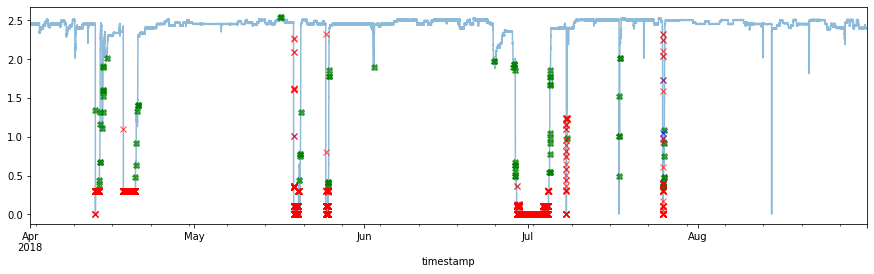

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


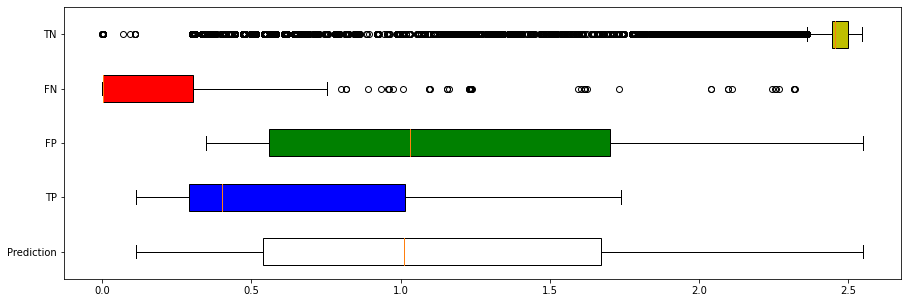

Anomalies: 14484
Anomalies by Algorithm : 205845
% Anomalies detected: 0.06%
False Positive Rate: 0.04
False Negative Rate: 99.94
Accuracy: 93.39
F1 Score: 0.12
Recall: 0.06
Precision: 10.11


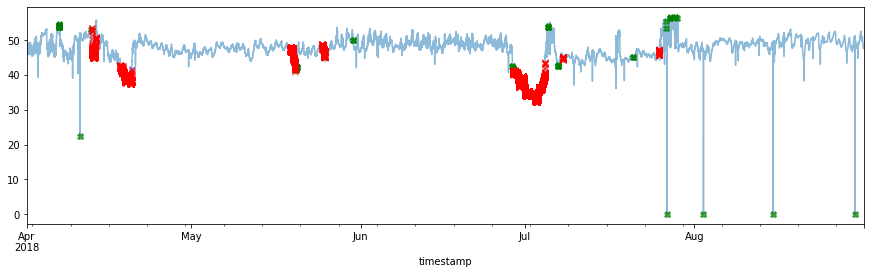

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


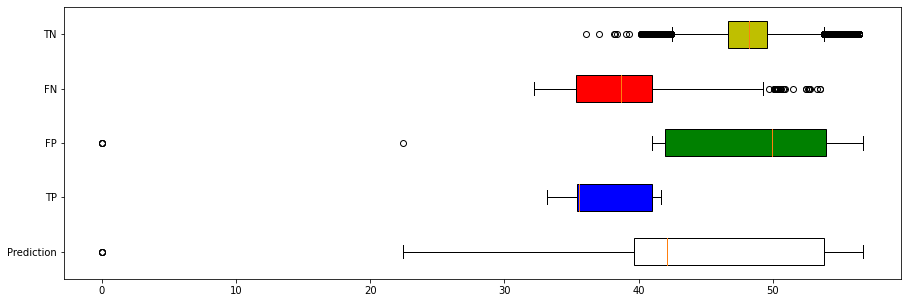

Anomalies: 14484
Anomalies by Algorithm : 205863
% Anomalies detected: 0.19%
False Positive Rate: 0.03
False Negative Rate: 99.81
Accuracy: 93.41
F1 Score: 0.37
Recall: 0.19
Precision: 30.68


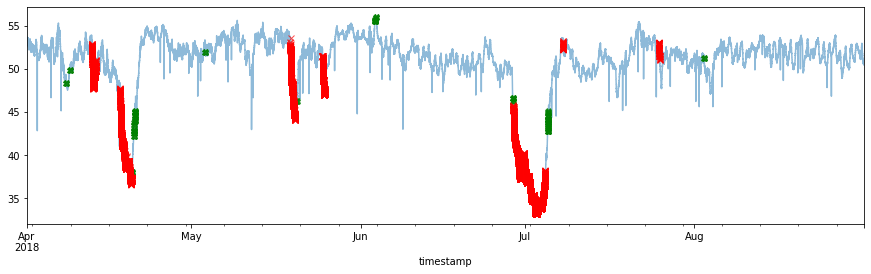

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


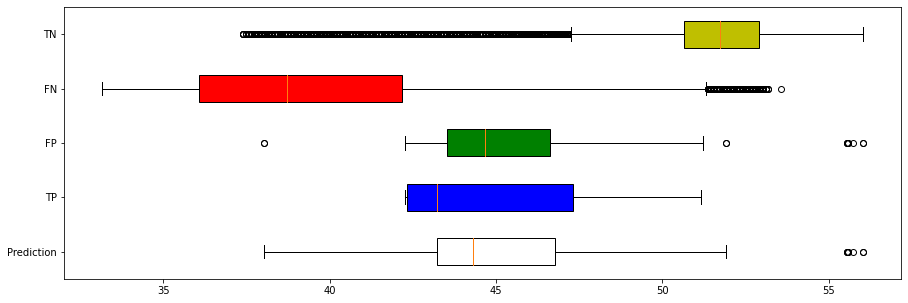

Anomalies: 14484
Anomalies by Algorithm : 205852
% Anomalies detected: 0.11%
False Positive Rate: 0.03
False Negative Rate: 99.89
Accuracy: 93.4
F1 Score: 0.22
Recall: 0.11
Precision: 19.05


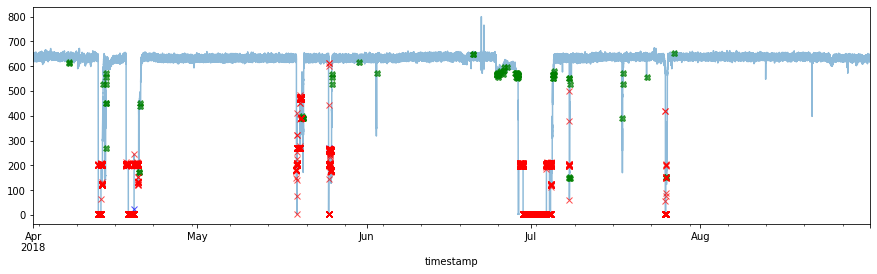

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


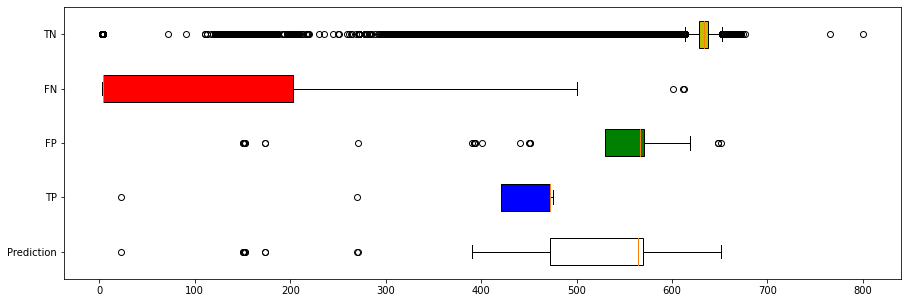

Anomalies: 14484
Anomalies by Algorithm : 205844
% Anomalies detected: 0.06%
False Positive Rate: 0.04
False Negative Rate: 99.94
Accuracy: 93.39
F1 Score: 0.11
Recall: 0.06
Precision: 9.2


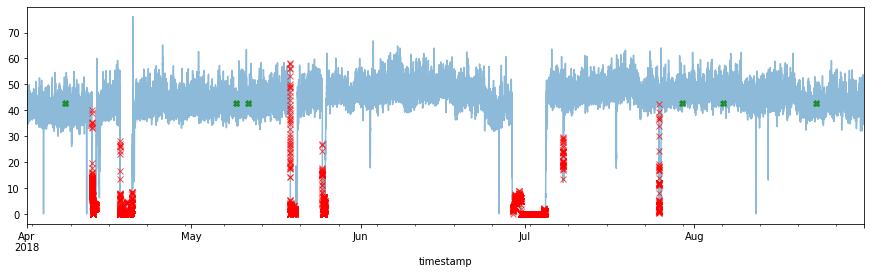

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


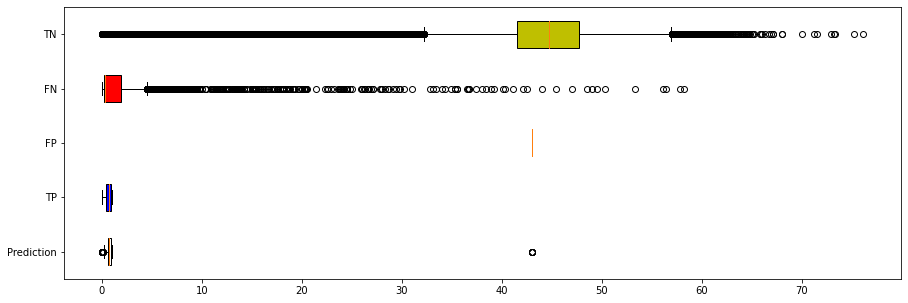

Anomalies: 14484
Anomalies by Algorithm : 205919
% Anomalies detected: 0.57%
False Positive Rate: 0.0
False Negative Rate: 99.43
Accuracy: 93.46
F1 Score: 1.14
Recall: 0.57
Precision: 93.26


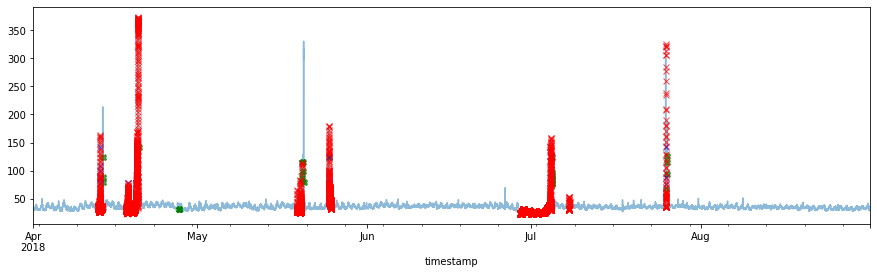

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


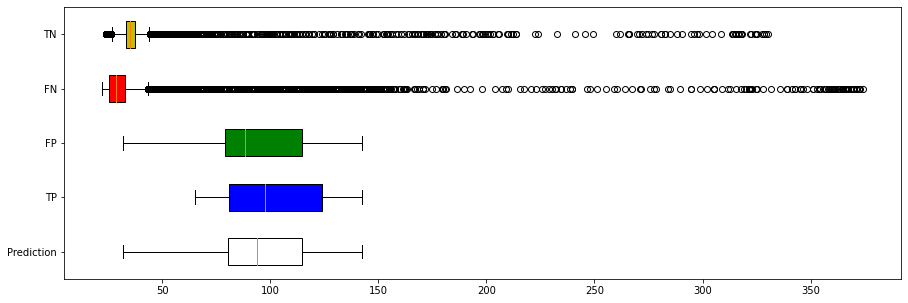

Anomalies: 14484
Anomalies by Algorithm : 205891
% Anomalies detected: 0.38%
False Positive Rate: 0.01
False Negative Rate: 99.62
Accuracy: 93.44
F1 Score: 0.76
Recall: 0.38
Precision: 64.71


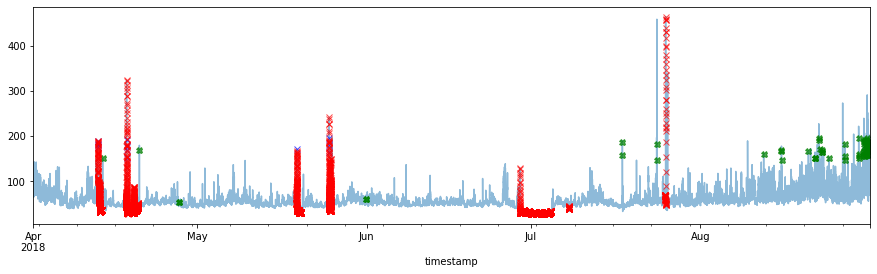

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


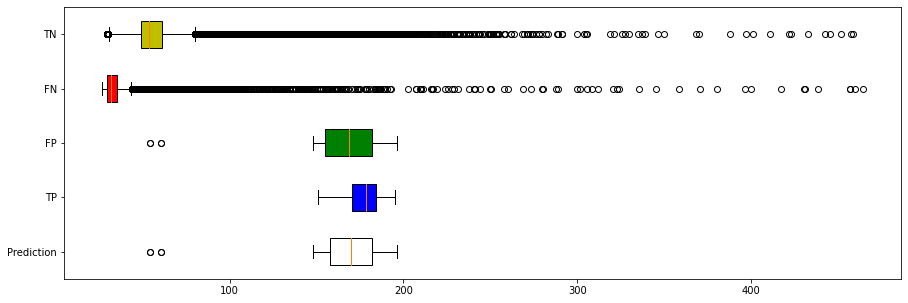

Anomalies: 14484
Anomalies by Algorithm : 205848
% Anomalies detected: 0.08%
False Positive Rate: 0.03
False Negative Rate: 99.92
Accuracy: 93.4
F1 Score: 0.16
Recall: 0.08
Precision: 16.0


In [ ]:
sensors = ["sensor_00","sensor_01", "sensor_02", 
           "sensor_04", "sensor_10",
           "sensor_42", "sensor_49"]
# outlier_label, normal_label, y_predicted = LOF(data_df_encod[sensors], sensor,multivariate=True)
metrics = []
for s in sensors:
    
    #predict anoalies
    outlier_label, normal_label, y_predicted = LOF(data_df_encod, s,multivariate=False)
    
    #filter results and plot predictions
    anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN = detection_anomalies(data_df_encod, 
                                                                   outlier_label, 
                                                                   normal_label,
                                                                   s,
                                                                   y_predicted)
    
    #apply metrics
    results = results_metrics(data_df_encod, y_predicted, anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN,s)
    results['sensor'] = s
    metrics.append(results)
    
data = pd.DataFrame(metrics)

In [ ]:
columns = ["sensor","Accuracy", "Precision", "Recall", "F1"]
columns_n = ["FNR", "FPR"]
result_t = data.style.applymap(style_positive, props='color:white;background-color:green', subset=columns)\
              .applymap(style_medium, props='color:black;background-color:lightgreen', subset=columns)\
            .applymap(style_negative, props='color:black;background-color:red', subset=columns)\
            .applymap(style_positive_n, props='color:white;background-color:green', subset=columns_n)\
              .applymap(style_medium_n, props='color:black;background-color:lightgreen', subset=columns_n)\
            .applymap(style_negative_n, props='color:black;background-color:red', subset=columns_n)
result_t

,Accuracy,F1,Recall,Precision,FNR,FPR,anomalies_detected,anomalies_detected_percentage,TP_mean,FP_mean,FN_mean,TN_mean,TP_std,FP_std,FN_std,TN_std,sensor
0,93.390000,0.120000,0.060000,10.110000,99.940000,0.040000,205845,0.062138,0.672917,1.147660,0.102914,2.420974,0.550995,0.606498,0.157500,0.240916,sensor_00
1,93.410000,0.370000,0.190000,30.680000,99.810000,0.030000,205863,0.186413,37.082045,45.514662,39.230123,48.187034,3.275448,13.912935,4.367634,2.233639,sensor_01
2,93.400000,0.220000,0.110000,19.050000,99.890000,0.030000,205852,0.110467,44.925406,46.116129,39.921320,51.638744,3.488182,4.357297,5.130601,1.874237,sensor_02
3,93.390000,0.110000,0.060000,9.200000,99.940000,0.040000,205844,0.055233,390.822473,510.866441,92.969143,625.717553,164.734597,128.380664,117.862711,50.719341,sensor_04
4,93.460000,1.140000,0.570000,93.260000,99.430000,0.000000,205919,0.573046,0.616350,42.975992,1.693862,44.268899,0.306829,0.000116,3.371160,6.048104,sensor_10
5,93.440000,0.760000,0.380000,64.710000,99.620000,0.010000,205891,0.379729,101.316281,89.170999,35.488142,35.425214,22.983994,29.280233,32.117613,6.205809,sensor_42
6,93.400000,0.160000,0.080000,16.000000,99.920000,0.030000,205848,0.082850,177.228008,162.930274,36.391015,58.538111,12.378968,31.036142,23.030077,17.840261,sensor_49


# Multivariate Local Outliers Factor

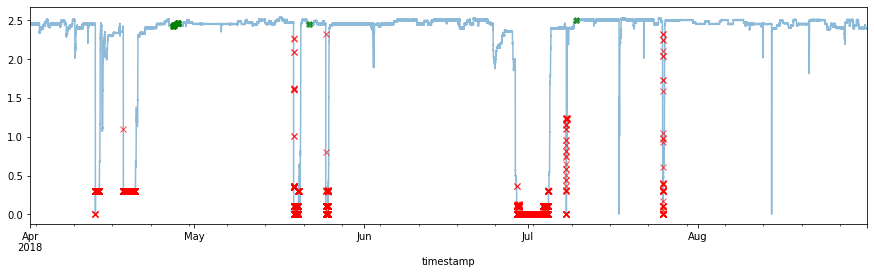

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


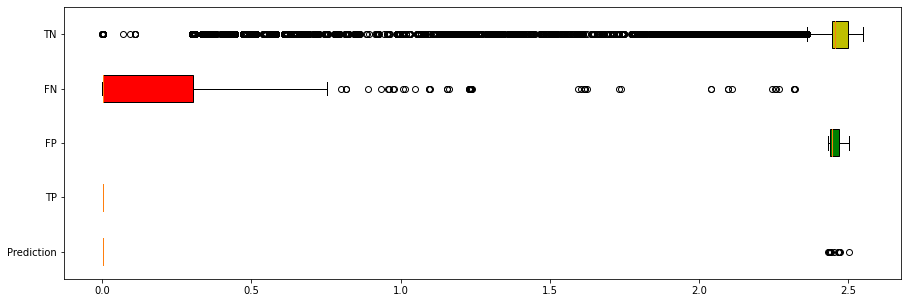

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


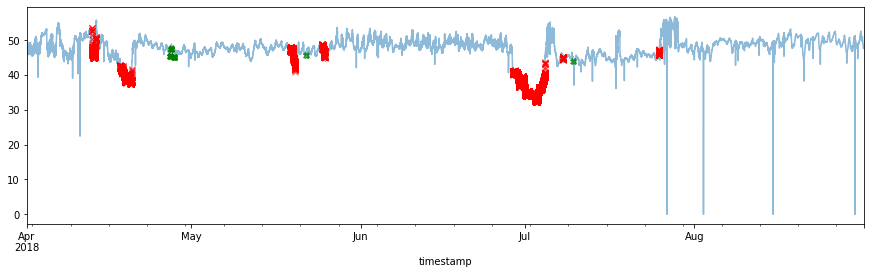

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


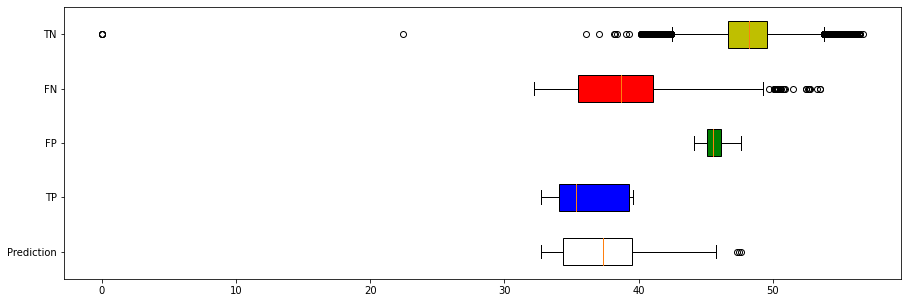

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


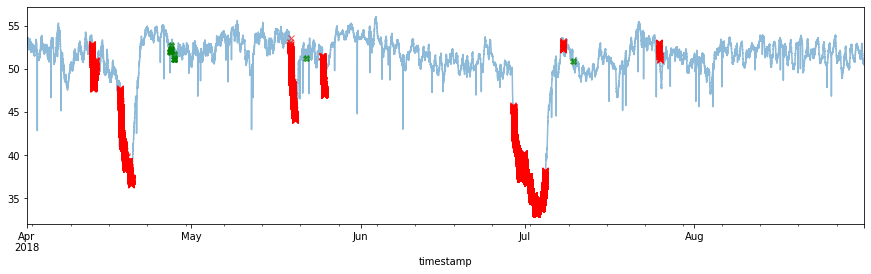

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


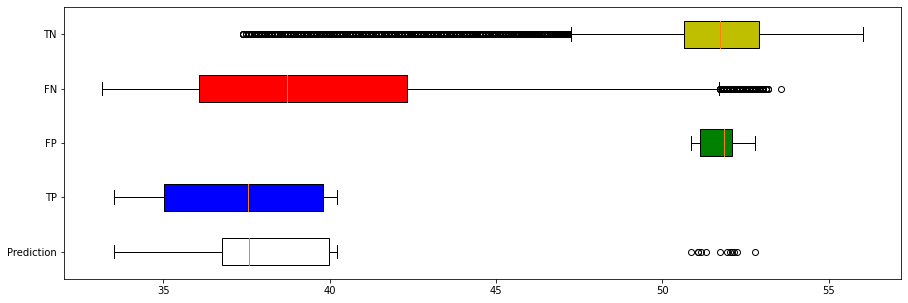

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


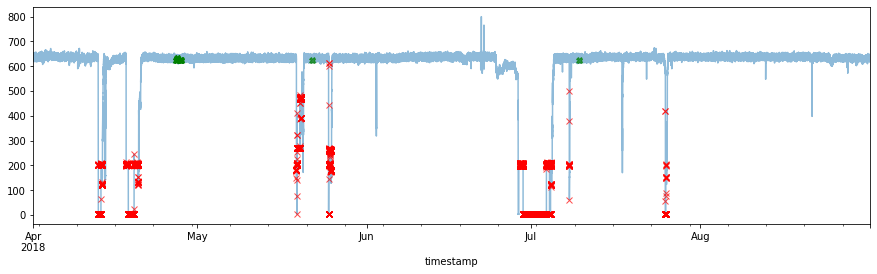

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


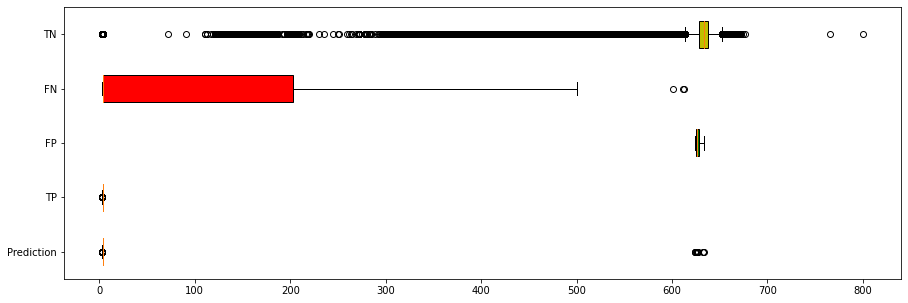

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


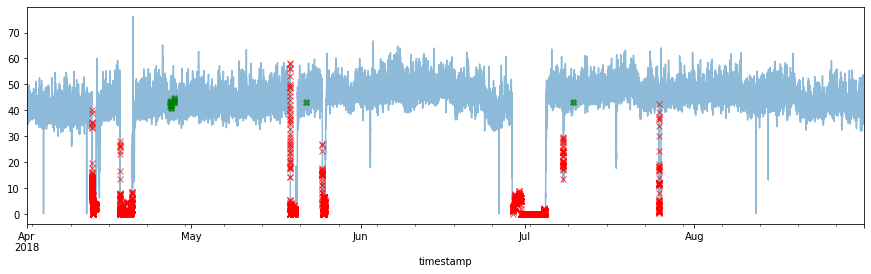

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


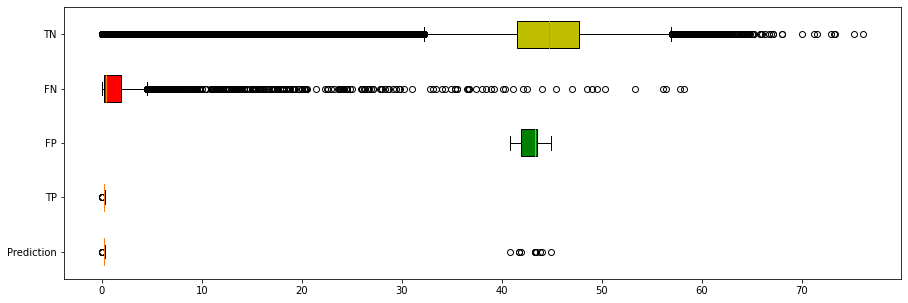

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


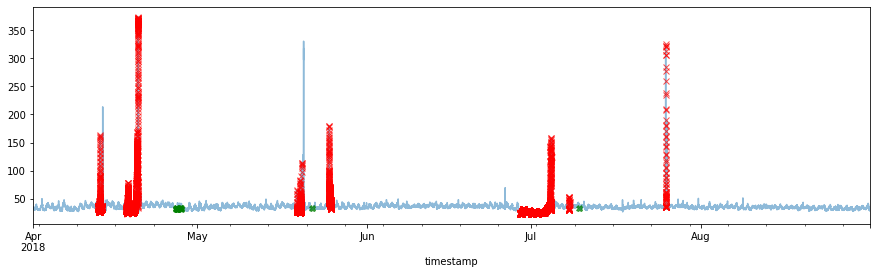

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


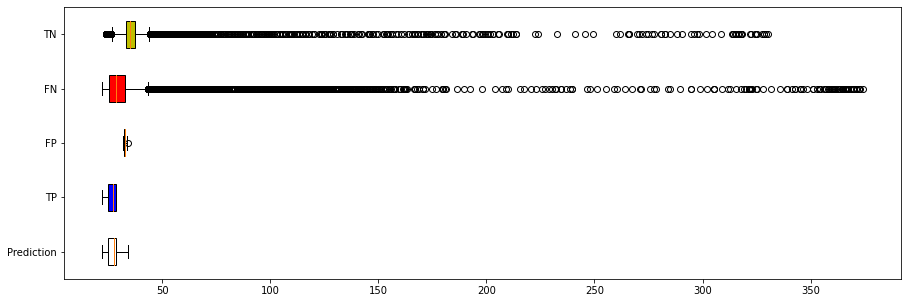

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


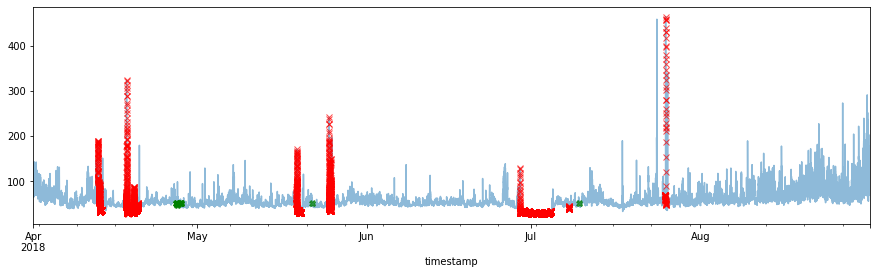

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


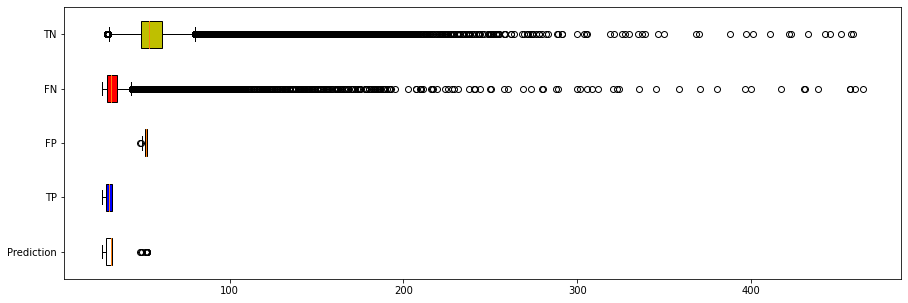

Anomalies: 14484
Anomalies by Algorithm : 205913
% Anomalies detected: 0.53%
False Positive Rate: 0.01
False Negative Rate: 99.47
Accuracy: 93.46
F1 Score: 1.06
Recall: 0.53
Precision: 86.52


In [ ]:
#predicting anomalies
outlier_label, normal_label, y_predicted = LOF(data_df_encod[sensors], s,multivariate=True)
metrics = []
for s in sensors:    
    #filter results and plot predictions
    anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN = detection_anomalies(data_df_encod, 
                                                                   outlier_label, 
                                                                   normal_label,
                                                                   s,
                                                                   y_predicted)
    
    #apply metrics
    results = results_metrics(data_df_encod, y_predicted, anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN,s)
    results['sensor'] = s
    metrics.append(results)
    
data = pd.DataFrame(metrics)

In [ ]:
columns = ["sensor","Accuracy", "Precision", "Recall", "F1"]
columns_n = ["FNR", "FPR"]
result_t = data.style.applymap(style_positive, props='color:white;background-color:green', subset=columns)\
              .applymap(style_medium, props='color:black;background-color:lightgreen', subset=columns)\
            .applymap(style_negative, props='color:black;background-color:red', subset=columns)\
            .applymap(style_positive_n, props='color:white;background-color:green', subset=columns_n)\
              .applymap(style_medium_n, props='color:black;background-color:lightgreen', subset=columns_n)\
            .applymap(style_negative_n, props='color:black;background-color:red', subset=columns_n)
result_t

,Accuracy,F1,Recall,Precision,FNR,FPR,anomalies_detected,anomalies_detected_percentage,TP_mean,FP_mean,FN_mean,TN_mean,TP_std,FP_std,FN_std,TN_std,sensor
0,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,0.003935,2.454572,0.103799,2.420477,0.000000,0.022205,0.158877,0.242471,sensor_00
1,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,36.471860,45.793548,39.240840,48.186381,2.580773,1.102598,4.369729,2.246353,sensor_01
2,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,37.559184,51.710790,39.939503,51.636915,2.263228,0.595815,5.139828,1.878308,sensor_02
3,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,3.322548,627.401608,93.613664,625.673372,0.151481,3.487682,118.225366,50.822439,sensor_04
4,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,0.222051,42.961996,1.695521,44.268938,0.061046,1.161527,3.369808,6.048182,sensor_10
5,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,26.532061,32.617185,35.787314,35.433211,2.037852,0.676583,32.420679,6.248998,sensor_42
6,93.460000,1.060000,0.530000,86.520000,99.470000,0.010000,205913,0.531621,30.442070,51.408177,36.540117,58.570480,1.908601,1.517791,23.434724,17.939279,sensor_49


# LSTM, Autoencoder architecture

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# scaler = scaler.fit(data_df_encod.iloc[:,:-1])

In [ ]:
data_df_encod_scaled = data_df_encod.copy()
data_df_encod_scaled[sensors] = scaler.fit_transform(data_df_encod_scaled[sensors])

In [ ]:
def create_dataset(X,y,timesteps):
    Xval, yval = [], []
    for i in range(len(X) - timesteps):
        Xval.append(X.iloc[i:(i+timesteps)].values)
        yval.append(y.iloc[i:(i+timesteps)])
    return np.array(Xval), np.array(yval)

In [ ]:
time_steps = 30
sensr=sensors[0]
X_dst_tf, y_dst_tf = create_dataset(data_df_encod_scaled[[sensr]],data_df_encod_scaled[sensr],time_steps) 

In [ ]:
X_dst_tf.shape

(220290, 30, 1)

In [ ]:
y_dst_tf.shape

(220290, 30)

In [ ]:
from tensorflow.keras.layers import LSTM,Dropout,RepeatVector,TimeDistributed,Dense
from tensorflow.keras import Sequential

#Autoencoder architecture
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_dst_tf.shape[1], X_dst_tf.shape[2])))
#Dropping neurons to avoid overfitting
model.add(Dropout(rate=0.2))
model.add(RepeatVector(n=X_dst_tf.shape[1]))
model.add(LSTM(units=128, return_sequences=True))
#Dropping neurons to avoid overfitting
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(units=X_dst_tf.shape[2])))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 30, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 30, 1)            129       
 ibuted)                                                

In [ ]:
history = model.fit(X_dst_tf, y_dst_tf,epochs=3,batch_size=32,shuffle=False, validation_split=0.2)

Epoch 1/3
5508/5508 [==============================] - 59s 9ms/step - loss: 0.0656 - val_loss: 0.0297
Epoch 2/3
5508/5508 [==============================] - 50s 9ms/step - loss: 0.0583 - val_loss: 0.0362
Epoch 3/3
5508/5508 [==============================] - 50s 9ms/step - loss: 0.0588 - val_loss: 0.0318


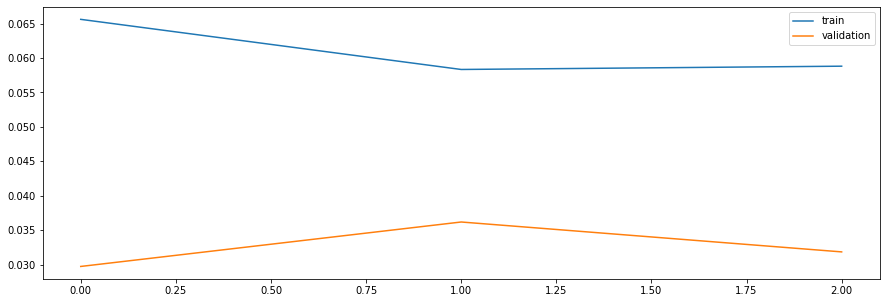

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [ ]:
predictions = model.predict(X_dst_tf)

In [ ]:
pred_mae_loss = np.mean(np.abs(predictions - X_dst_tf), axis=1)

In [ ]:
pred_mae_loss.shape
print(X_dst_tf.shape)
print(pred_mae_loss.shape)
print(predictions.shape)

(220290, 30, 1)
(220290, 1)
(220290, 30, 1)


(array([200650.,   1554.,    725.,    376.,    253.,    557.,    579.,
           773.,   4574.,  10249.]),
 array([1.28727313e-03, 2.40213842e-01, 4.79140411e-01, 7.18066979e-01,
        9.56993548e-01, 1.19592012e+00, 1.43484669e+00, 1.67377325e+00,
        1.91269982e+00, 2.15162639e+00, 2.39055296e+00]),
 <a list of 10 Patch objects>)

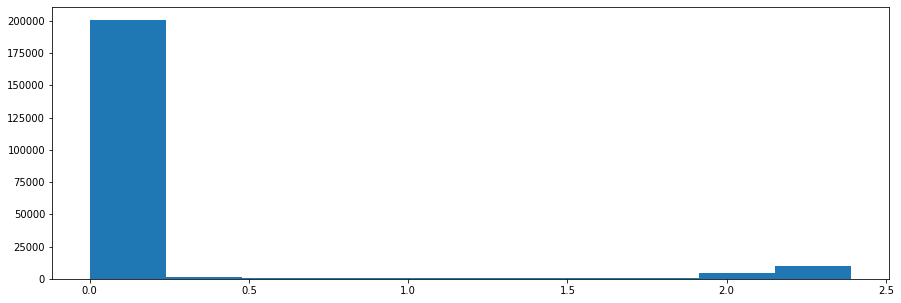

In [ ]:
plt.hist(pred_mae_loss)

In [ ]:
threshold = 1.5
score_df = pd.DataFrame(index=data_df_encod_scaled[time_steps:].index)
score_df['loss'] = pred_mae_loss
score_df['threshold'] = threshold
score_df['anomaly'] = score_df.loss > score_df.threshold
score_df[sensr] = data_df_encod[sensr]

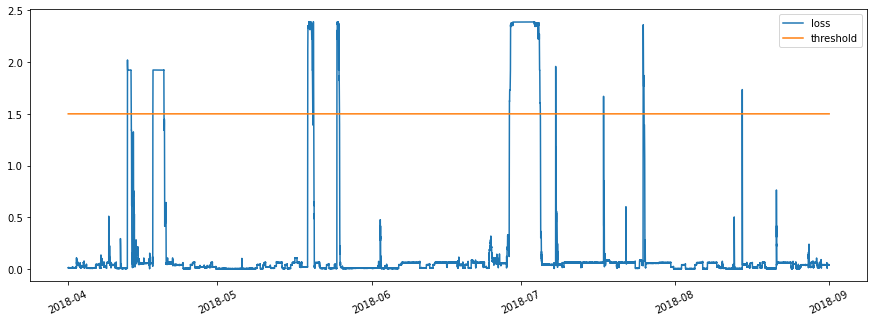

In [ ]:
plt.plot(score_df.index, score_df.loss, label="loss")
plt.plot(score_df.index, score_df.threshold, label="threshold")
plt.xticks(rotation=25)
plt.legend()

In [ ]:
anomalies = score_df[score_df.anomaly == True]

In [ ]:
preds_label= score_df.anomaly.copy()
preds_label[preds_label == True]=1
preds_label[preds_label == False]=0

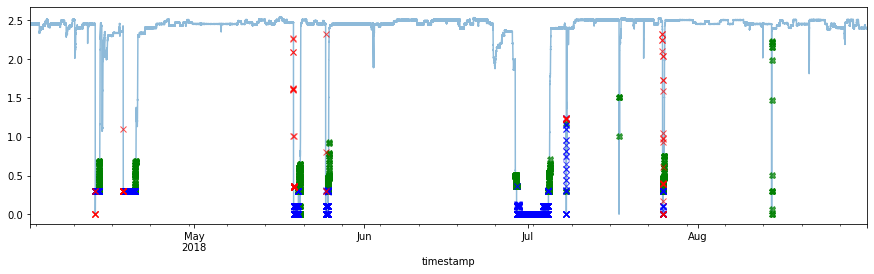

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


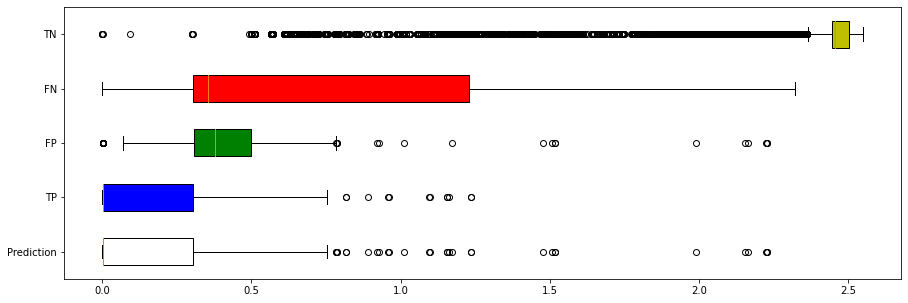

In [ ]:
detection_anomalies(data_df_encod[time_steps:],1,0,sensr,preds_label);

# Industrializing the LSTM method to the 7 sensors. 
After some test of threshold on se sensor 00 we choose to define a threshold of 1.0 for the mean absolute error loss : when it's over the threshold we consider that the given element is an anomaly.

In [ ]:
def LongShortTermMemory(model,data,sensor):
    
    data_df_encod_scaled = data.copy()
    data_df_encod_scaled[sensors] = scaler.fit_transform(data_df_encod_scaled[sensors])
    time_steps = 30
    X_dst_tf, y_dst_tf = create_dataset(data_df_encod_scaled[[sensor]],data_df_encod_scaled[sensor],time_steps) 
    
    history = model.fit(X_dst_tf, y_dst_tf,epochs=1,batch_size=32,shuffle=False, validation_split=0.2)
    predictions = model.predict(X_dst_tf)
    pred_mae_loss = np.mean(np.abs(predictions - X_dst_tf), axis=1)
    threshold = 1.0
    score_df = pd.DataFrame(index=data_df_encod_scaled[time_steps:].index)
    score_df['loss'] = pred_mae_loss
    score_df['threshold'] = threshold
    score_df['anomaly'] = score_df.loss > score_df.threshold
#     score_df[sensor] = data_df_encod[sensor]
    
    
    y_predicted= score_df.anomaly.copy()
    y_predicted[preds_label == True] = 1
    y_predicted[preds_label == False] = 0
    outlier_label = 1
    normal_label = 0
    return outlier_label, normal_label, y_predicted

In [ ]:
#Autoencoder architecture
pipeline = Sequential()
pipeline.add(LSTM(units=64, input_shape=(X_dst_tf.shape[1], X_dst_tf.shape[2])))
#Dropping neurons to avoid overfitting
pipeline.add(Dropout(rate=0.2))
pipeline.add(RepeatVector(n=X_dst_tf.shape[1]))
pipeline.add(LSTM(units=64, return_sequences=True))
#Dropping neurons to avoid overfitting
pipeline.add(Dropout(rate=0.2))
pipeline.add(TimeDistributed(Dense(units=X_dst_tf.shape[2])))
pipeline.compile(loss='mae', optimizer='adam')
    

5508/5508 [==============================] - 46s 8ms/step - loss: 0.0585 - val_loss: 0.0114


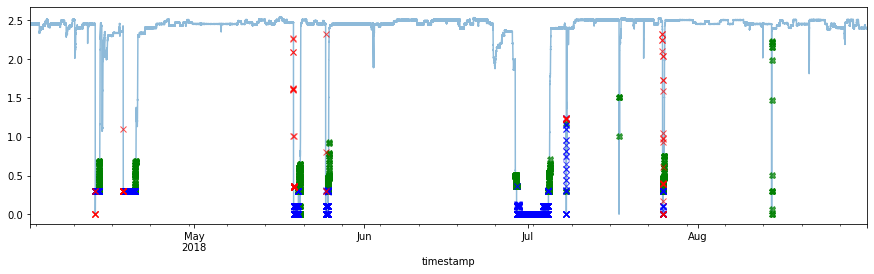

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


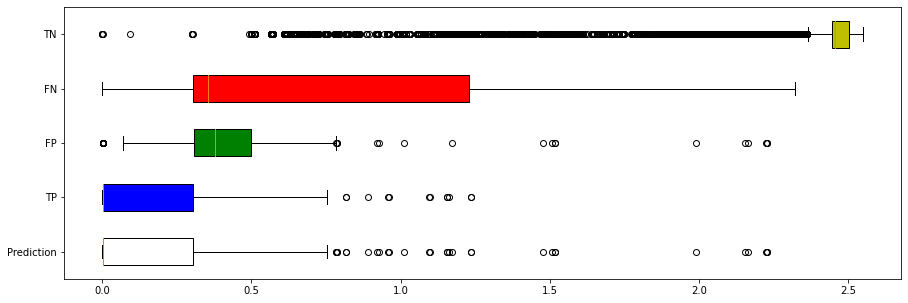

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 42s 8ms/step - loss: 0.1064 - val_loss: 0.0577


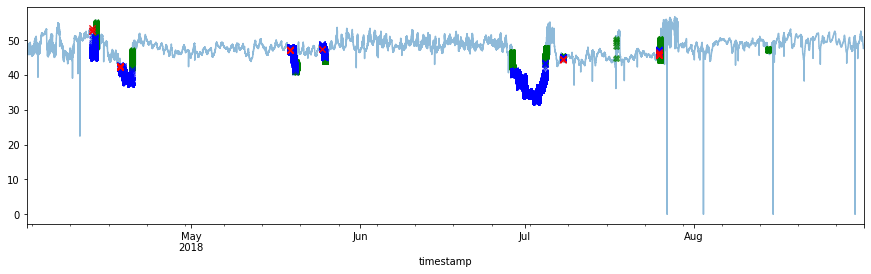

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


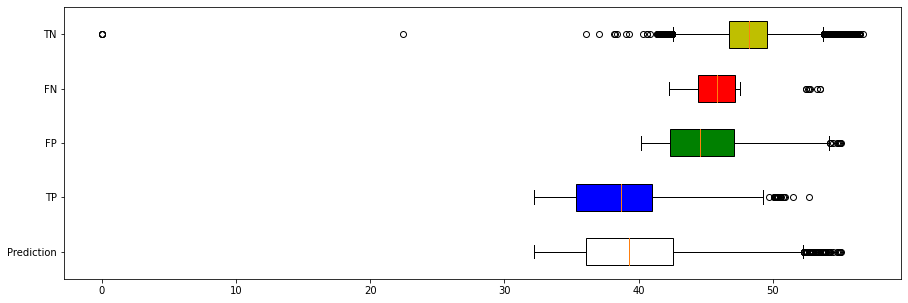

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 43s 8ms/step - loss: 0.0603 - val_loss: 0.0214


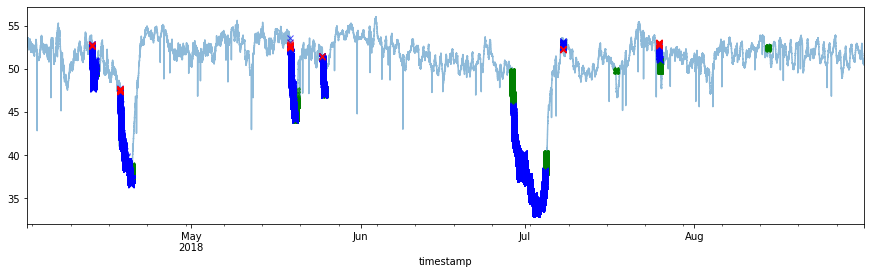

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


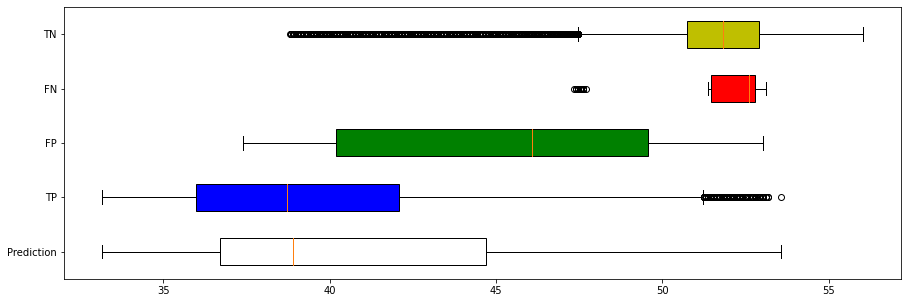

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 44s 8ms/step - loss: 0.0757 - val_loss: 0.0335


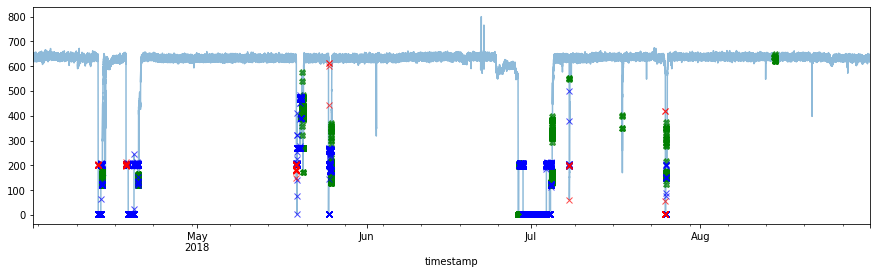

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


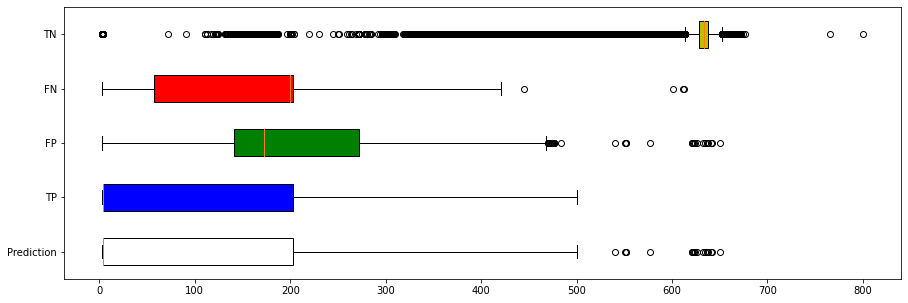

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 44s 8ms/step - loss: 0.1261 - val_loss: 0.0710


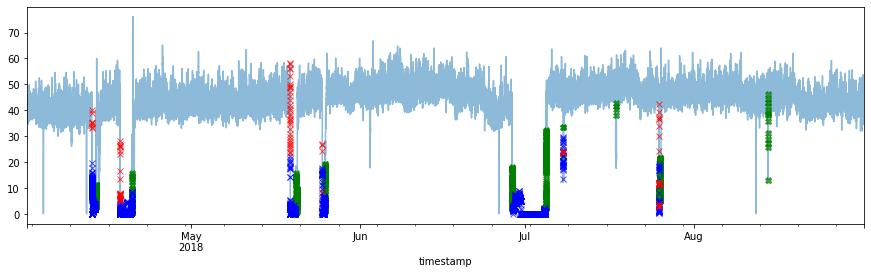

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


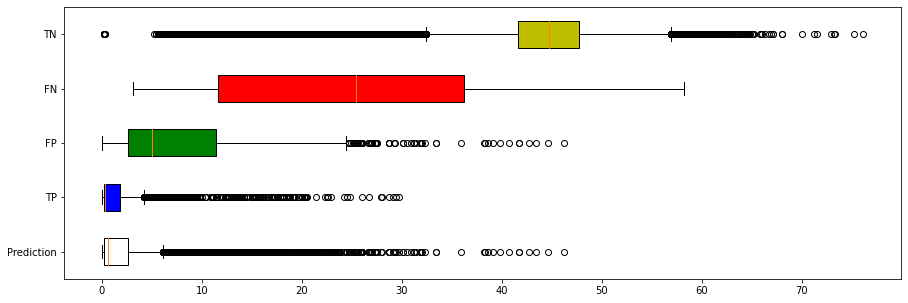

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 44s 8ms/step - loss: 0.1013 - val_loss: 0.0311


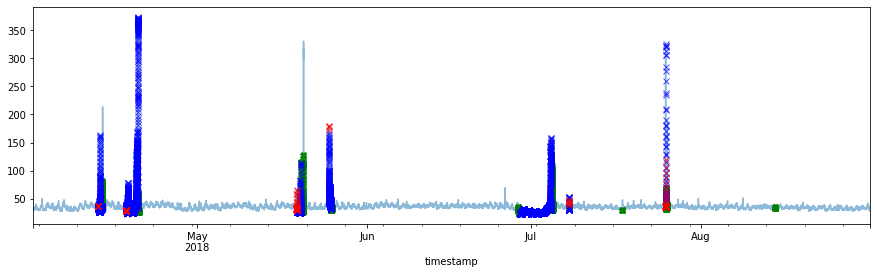

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


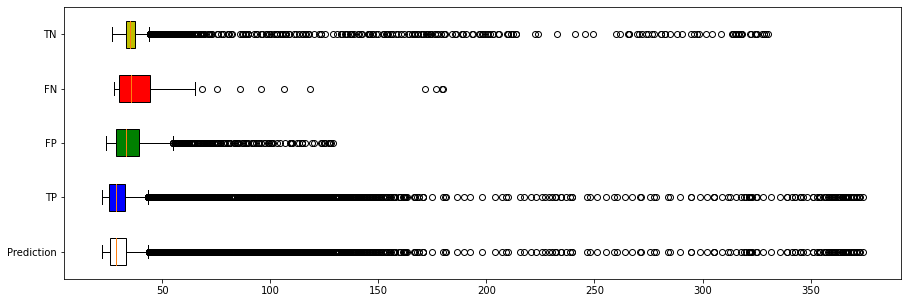

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88
5508/5508 [==============================] - 49s 9ms/step - loss: 0.0816 - val_loss: 0.1836


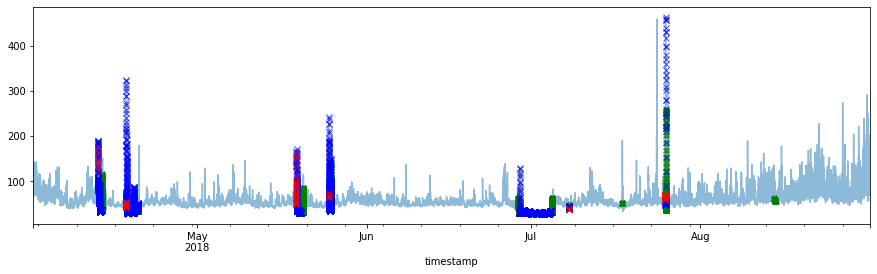

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


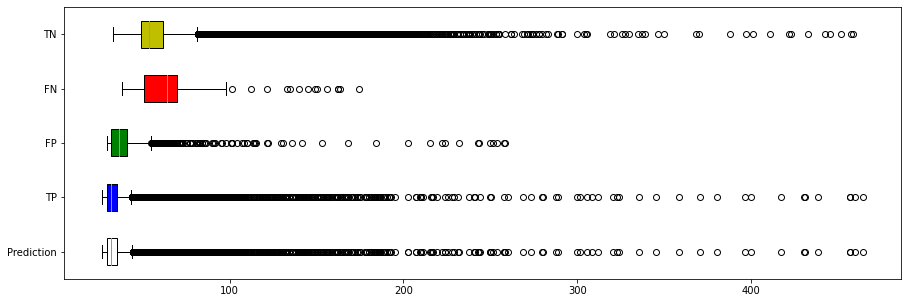

Anomalies: 14484
Anomalies by Algorithm : 220188
% Anomalies detected: 99.30%
False Positive Rate: 0.79
False Negative Rate: 0.7
Accuracy: 99.22
F1 Score: 94.35
Recall: 99.3
Precision: 89.88


In [ ]:

metrics = []
for s in sensors:
    
    #predict anomalies
    outlier_label, normal_label, y_predicted = LongShortTermMemory(pipeline,data_df_encod, s)
    
    #filter results and plot predictions
    anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN = detection_anomalies(data_df_encod[time_steps:], 
                                                                   outlier_label, 
                                                                   normal_label,
                                                                   s,
                                                                   y_predicted)
    
    #apply metrics
    results = results_metrics(data_df_encod[time_steps:], y_predicted, anomalies_FP, anomalies_TP, anomalies_FN, anomalies_TN,s)
    results['sensor'] = s
    metrics.append(results)
    
data = pd.DataFrame(metrics)

In [ ]:
result_t.data[['Accuracy','F1','Precision', 'Recall','FNR','FPR']]

result_t.data["sensor"]='Univariate'

result_t.data["Method"]='LSTM'

result_t.data[["sensor","Method","Accuracy","F1","Recall","Precision","FNR","FPR"]].to_csv('/content/drive/MyDrive/Colab Notebooks/LSTM_univariate.csv')